In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

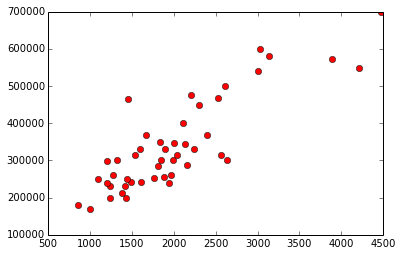

In [30]:
# data : house prices in portlan oregon

size_data = np.asarray([ 2104,  1600,  2400,  1416,  3000,  1985,  1534,  1427,
                           1380,  1494,  1940,  2000,  1890,  4478,  1268,  2300,
                           1320,  1236,  2609,  3031,  1767,  1888,  1604,  1962,
                           3890,  1100,  1458,  2526,  2200,  2637,  1839,  1000,
                           2040,  3137,  1811,  1437,  1239,  2132,  4215,  2162,
                           1664,  2238,  2567,  1200,   852,  1852,  1203 ])

price_data = np.asarray([ 399900,  329900,  369000,  232000,  539900,  299900,  314900,  198999,
                            212000,  242500,  239999,  347000,  329999,  699900,  259900,  449900,
                            299900,  199900,  499998,  599000,  252900,  255000,  242900,  259900,
                            573900,  249900,  464500,  469000,  475000,  299900,  349900,  169900,
                            314900,  579900,  285900,  249900,  229900,  345000,  549000,  287000,
                            368500,  329900,  314000,  299000,  179900,  299900,  239500 ])

plt.plot(size_data, price_data, 'ro', label='house prices with size')
plt.show()

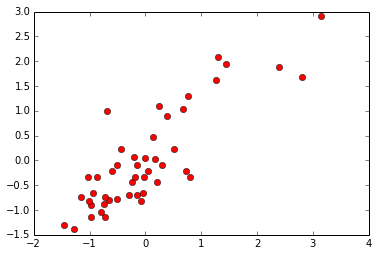

In [45]:
def normalize(array):
    return (array - array.mean())/array.std()

# normalize input data
size_data_n = normalize(size_data)
price_data_n = normalize(price_data)

plt.plot(size_data_n, price_data_n, 'ro')
plt.show()

iteration: 0 W: [ 0.01709975] b:[ -1.49011609e-10]
iteration: 10 W: [ 0.17037222] b:[ -1.04308129e-09]
iteration: 20 W: [ 0.29560694] b:[ -1.49011603e-09]
iteration: 30 W: [ 0.39793283] b:[ -1.11758713e-09]
iteration: 40 W: [ 0.48154056] b:[ -2.38418574e-09]
iteration: 50 W: [ 0.54985416] b:[ -3.27825544e-09]
iteration: 60 W: [ 0.60567141] b:[ -4.69386530e-09]
iteration: 70 W: [ 0.65127814] b:[ -5.60656055e-09]
iteration: 80 W: [ 0.68854213] b:[ -6.94766467e-09]
iteration: 90 W: [ 0.71898955] b:[ -8.04662559e-09]
iteration: 100 W: [ 0.74386728] b:[ -9.20146626e-09]
iteration: 110 W: [ 0.76419413] b:[ -9.12695963e-09]
iteration: 120 W: [ 0.78080273] b:[ -1.00489697e-08]
iteration: 130 W: [ 0.79437315] b:[ -9.85339188e-09]
iteration: 140 W: [ 0.80546123] b:[ -1.06822684e-08]
iteration: 150 W: [ 0.8145209] b:[ -1.08778453e-08]
iteration: 160 W: [ 0.82192338] b:[ -1.15670229e-08]
iteration: 170 W: [ 0.82797176] b:[ -1.24890329e-08]
iteration: 180 W: [ 0.8329137] b:[ -1.34762352e-08]
iterat

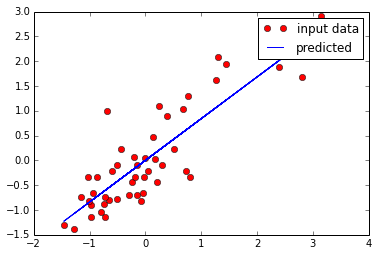

In [49]:
# model
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

# linear model : Y = WX + b
y = W * size_data_n + b

# cost func
loss = tf.reduce_mean(tf.square(y-price_data_n))
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    
    for step in xrange(200):
        sess.run(optimizer)
        if step % 10 == 0:
            print 'iteration: {} W: {} b:{}'.format(step, sess.run(W), sess.run(b))
    
    W_final = sess.run(W)
    b_final = sess.run(b)
    print 'Final W:{}, b: {}'.format(W_final, b_final)


plt.figure()
plt.plot(size_data_n, price_data_n, 'ro', label='input data')
plt.plot(size_data_n, W_final*size_data_n+b_final, label='predicted')
plt.legend()
plt.show()
